In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
from random import sample
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from xgboost import plot_importance
from xgboost import plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report , mean_squared_error
from sklearn.model_selection import cross_validate , KFold , cross_val_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# EDA

In [3]:
df = pd.read_csv('term-deposit-marketing-2020.csv')

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [5]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

### It is determined that there is no null value in the dataset

In [6]:
df.nunique()

age            70
job            12
marital         3
education       4
default         2
balance      6849
housing         2
loan            2
contact         3
day            31
month          11
duration     1535
campaign       48
y               2
dtype: int64

### Checking the unique values ​​of features


### Checking data types

In [7]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
y            object
dtype: object

### Object type data is seen, will be converted to categorical data type

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,40000.0,40.544600,9.641776,19.0,33.0,39.0,48.0,95.0
balance,40000.0,1274.277550,2903.769716,-8019.0,54.0,407.0,1319.0,102127.0
day,40000.0,16.017225,8.278127,1.0,8.0,17.0,21.0,31.0
duration,40000.0,254.824300,259.366498,0.0,100.0,175.0,313.0,4918.0
campaign,40000.0,2.882175,3.239051,1.0,1.0,2.0,3.0,63.0


## The standard deviation of the duration feature is observed to be very high

# Checking Frequencies

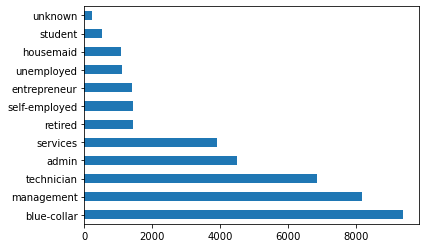

In [9]:
df['job'].value_counts().plot.barh()

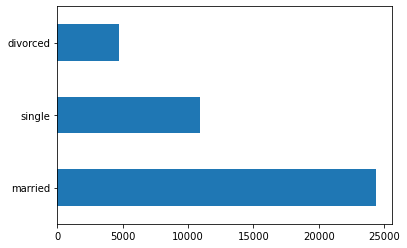

In [10]:
df['marital'].value_counts().plot.barh()

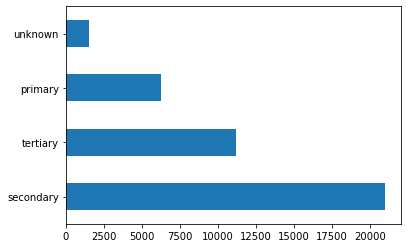

In [11]:
df['education'].value_counts().plot.barh()

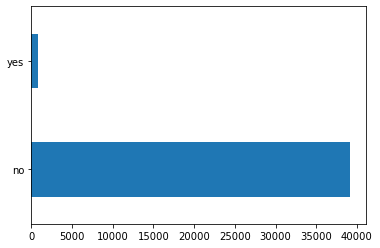

In [12]:
df['default'].value_counts().plot.barh()

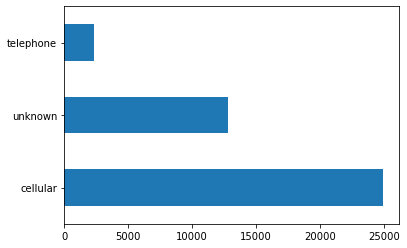

In [13]:
df['contact'].value_counts().plot.barh();

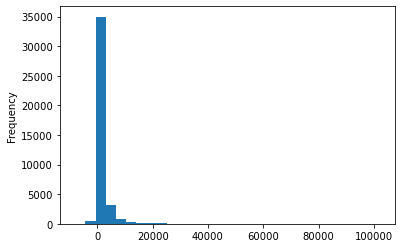

In [14]:
df['balance'].plot.hist(bins = 30)

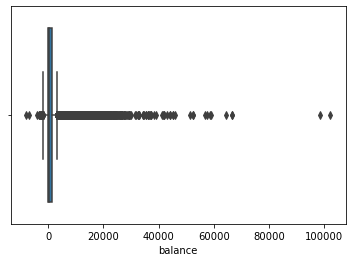

In [15]:
sns.boxplot(x = df['balance'])

### Converting object data type to categorical data type

In [14]:
df[df.select_dtypes(['object']).columns] = df.select_dtypes(['object']).apply(lambda x: x.astype('category'))

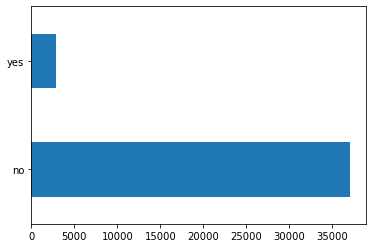

In [15]:
df['y'].value_counts().plot.barh();

### Target variable looks imbalanced

# Label Encoding

In [16]:
df_cats = df.select_dtypes('category')

In [17]:
le = LabelEncoder()

In [18]:
df[df_cats.columns] = df[df_cats.columns].apply(le.fit_transform)

In [19]:
df.dtypes

age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int64
duration     int64
campaign     int64
y            int64
dtype: object

In [20]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,0


In [21]:
df.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
age,1.000000,-0.019719,-0.386716,-0.091083,-0.014857,0.081517,-0.179606,0.000041,0.041114,-0.011689,-0.063437,-0.036270,0.016204,-0.020273
job,-0.019719,1.000000,0.051588,0.174336,-0.004977,0.015187,-0.114148,-0.024220,-0.077812,0.028441,-0.106735,-0.002445,0.013914,0.017250
marital,-0.386716,0.051588,1.000000,0.095899,-0.004595,0.008542,0.004453,-0.042975,-0.029242,0.000099,-0.006779,0.015772,-0.001259,0.030229
education,-0.091083,0.174336,0.095899,1.000000,-0.006647,0.066592,-0.083699,-0.043702,-0.096023,0.036206,-0.066100,0.001828,0.016562,0.037585
default,-0.014857,-0.004977,-0.004595,-0.006647,1.000000,-0.070069,-0.019229,0.075006,0.006881,0.006287,0.013660,-0.008597,0.012135,-0.006559
balance,0.081517,0.015187,0.008542,0.066592,-0.070069,1.000000,-0.049946,-0.080596,-0.011681,0.011662,0.023718,0.014072,-0.008137,0.030232
housing,-0.179606,-0.114148,0.004453,-0.083699,-0.019229,-0.049946,1.000000,0.004266,0.164406,-0.050622,0.327019,0.022455,-0.054823,-0.054336
loan,0.000041,-0.024220,-0.042975,-0.043702,0.075006,-0.080596,0.004266,1.000000,-0.030899,0.005838,0.027403,-0.003952,0.000582,-0.031029
contact,0.041114,-0.077812,-0.029242,-0.096023,0.006881,-0.011681,0.164406,-0.030899,1.000000,-0.045535,0.410025,-0.008292,0.003019,-0.089626
day,-0.011689,0.028441,0.000099,0.036206,0.006287,0.011662,-0.050622,0.005838,-0.045535,1.000000,-0.002587,-0.032983,0.165429,-0.006420


### The high correlation of duration feature with the target variable is observed (value = 0.4611)

# Train test split

In [22]:
y = df['y']
X = df.drop(['y'], axis=1)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

### I separate 0.30 of the data as test data

In [23]:
X_train.shape

(28000, 13)

In [24]:
X_test.shape

(12000, 13)

In [25]:
y_train.shape

(28000,)

In [26]:
y_test.shape

(12000,)

# Implementing XGBoost

### Since I saw the accuracy target in the task, the first algorithm that comes to my mind is XGBoost.

In [27]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier()

In [28]:
kfold = KFold(n_splits=5, random_state=42 , shuffle = True)
results = cross_val_score(xgb_model, X_train, y_train, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 93.55% (0.23%)


In [29]:
y_pred = xgb_model.predict(X_test)

In [30]:
kfold = KFold(n_splits=5, random_state=42 , shuffle = True)
results = cross_val_score(xgb_model, X_test, y_test, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 93.52% (0.67%)


### The accuracy score of the model seems to be quite high

In [31]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

RMSE: 0.252323


### The low RMSE value indicates that the model is better fit, in this model our RMSE value is 0.252323

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     11128
           1       0.64      0.29      0.40       872

    accuracy                           0.94     12000
   macro avg       0.79      0.64      0.68     12000
weighted avg       0.92      0.94      0.93     12000



### Since the duration feature will not be known when the call is not yet held, it will not be a feature that will work in the real world, I will discard this feature from the dataset in the future.I still I want to see the model

-------------------------------------

# Classification Report

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     11128
           1       0.64      0.29      0.40       872

    accuracy                           0.94     12000
   macro avg       0.79      0.64      0.68     12000
weighted avg       0.92      0.94      0.93     12000



### Although the overall accuracy seems to be quite high, the success in the estimates of the target 'yes' values is rather weak compared to the estimates of the 'no' values.

------------

# Roc Curve

In [34]:
probs = xgb_model.predict_proba(X_test)

In [35]:
probs = probs[:, 1]

In [36]:
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.94


In [37]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [38]:
fpr, tpr, thresholds = roc_curve(y_test, probs)

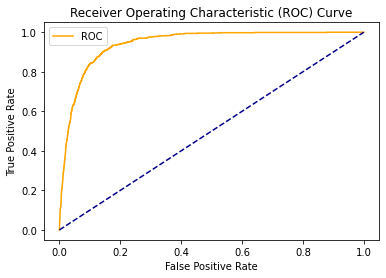

In [39]:
plot_roc_curve(fpr, tpr)

### Roc curve looks great but this model looks deceptive .
### Looks like 'duration' feature causing bias.

---------

# Feature Importance

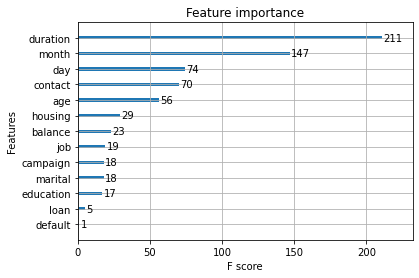

In [40]:
plot_importance(xgb_model)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

### Duration has the most impact

-----

# XGBoost model visualization

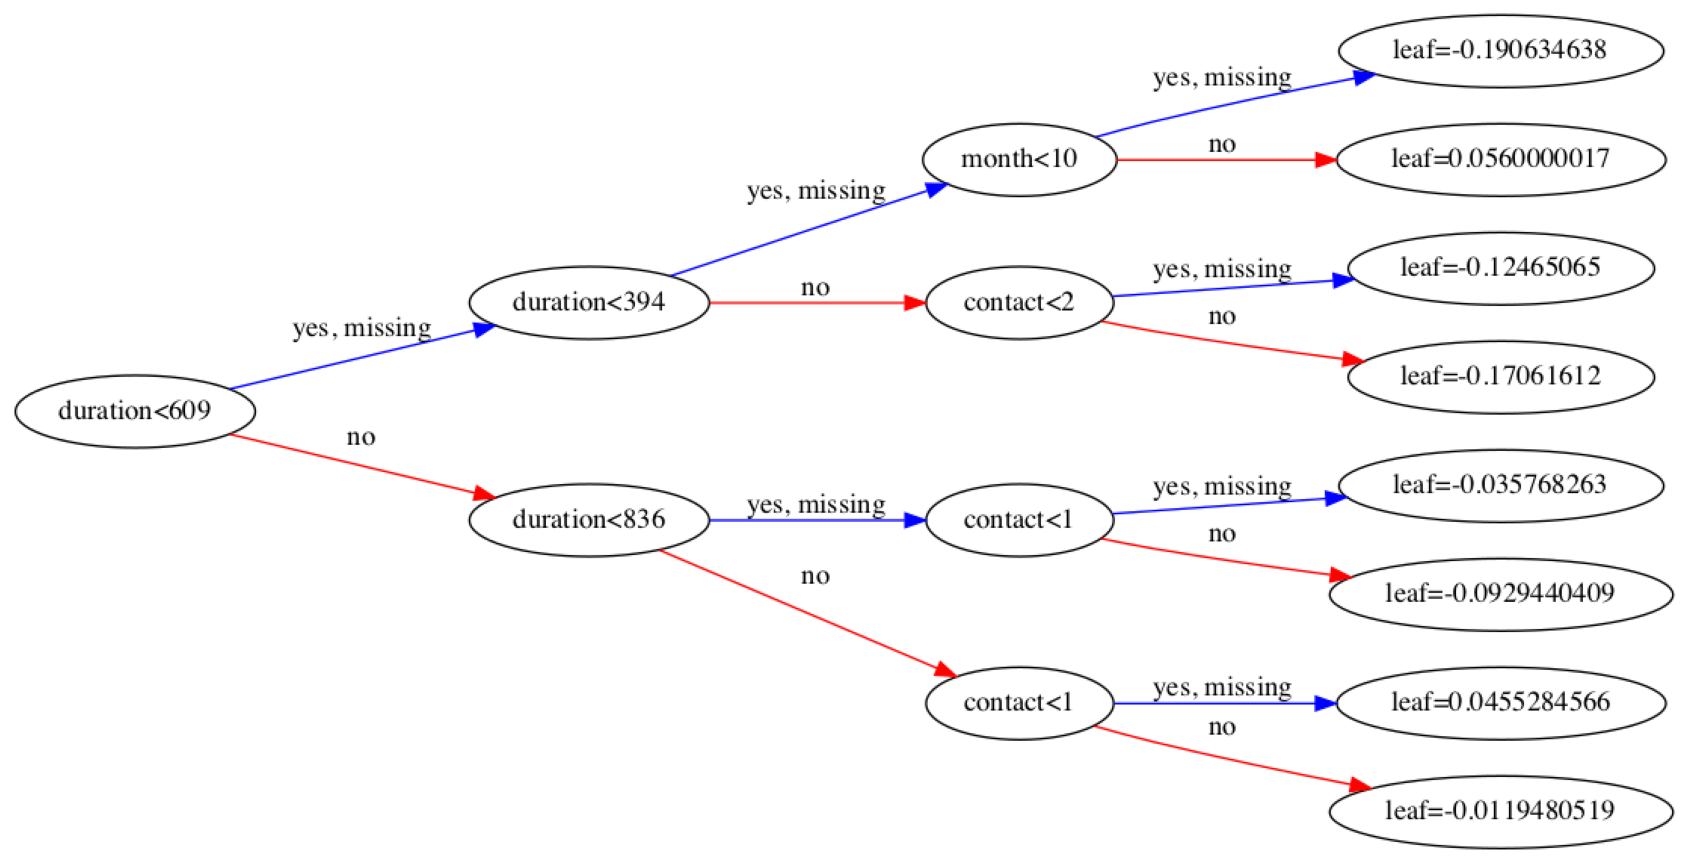

In [41]:
fig, ax = plt.subplots(figsize=(30, 30))
plot_tree(xgb_model, ax=ax , rankdir = 'LR')
plt.show()

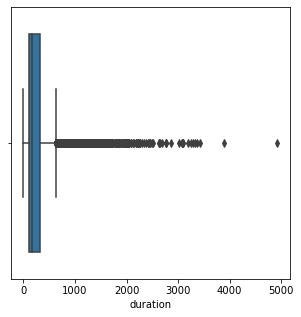

In [42]:
sns.boxplot(x = df['duration'])

# Removing the duration feature from the data and re-modeling

In [158]:
df = pd.read_csv('term-deposit-marketing-2020.csv')
df[df.select_dtypes(['object']).columns] = df.select_dtypes(['object']).apply(lambda x: x.astype('category'))
df_cats = df.select_dtypes('category')
le = LabelEncoder()
df[df_cats.columns] = df[df_cats.columns].apply(le.fit_transform)

In [159]:
y = df['y']
X = df.drop(['y','duration'], axis=1)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [160]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier()

In [161]:
kfold = KFold(n_splits=5, random_state=42, shuffle = True)
results = cross_val_score(xgb_model, X_train, y_train, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 92.80% (0.28%)


In [162]:
y_pred = xgb_model.predict(X_test)

In [163]:
kfold = KFold(n_splits=5, random_state=42, shuffle = True)
results = cross_val_score(xgb_model, X_test, y_test, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 92.80% (0.28%)


In [164]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

RMSE: 0.268949


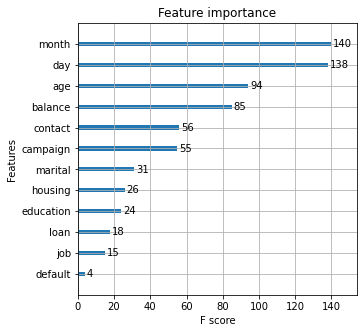

In [165]:
plot_importance(xgb_model)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

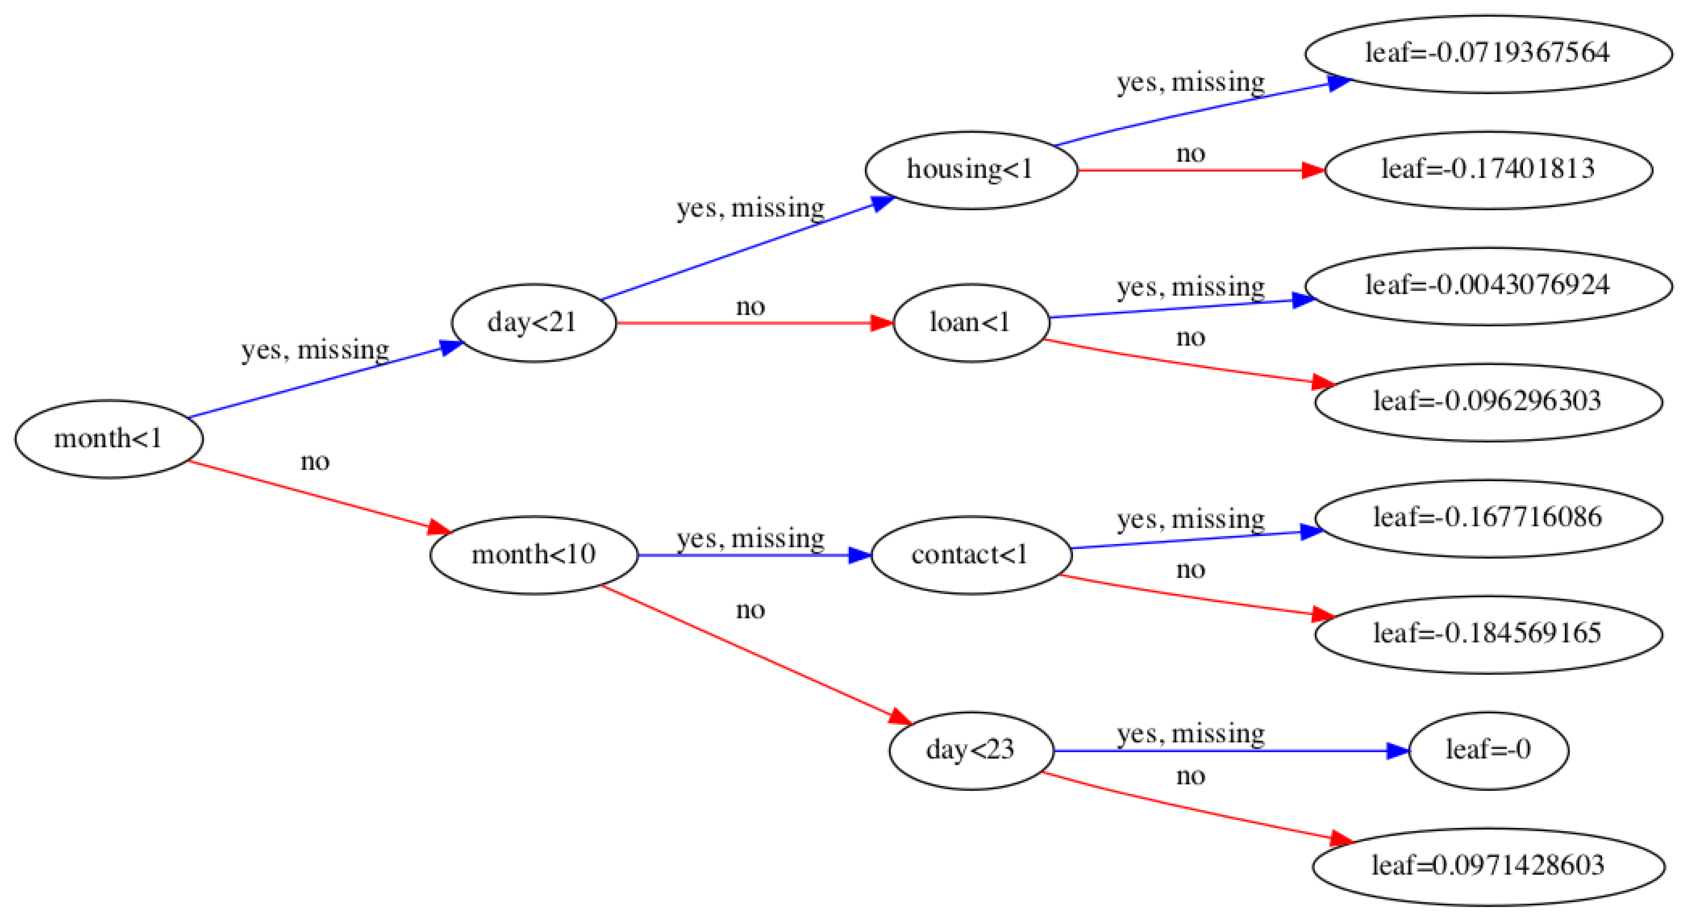

In [166]:
fig, ax = plt.subplots(figsize=(30, 30))
plot_tree(xgb_model, ax=ax , rankdir = 'LR')
plt.show()

---

In [52]:
probs = xgb_model.predict_proba(X_test)

In [53]:
probs = probs[:, 1]

In [54]:
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.70


In [55]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [56]:
fpr, tpr, thresholds = roc_curve(y_test, probs)

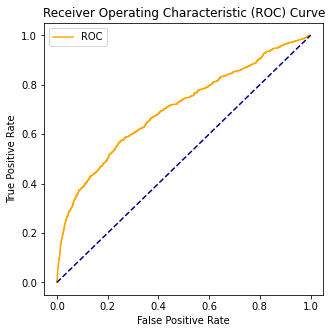

In [57]:
plot_roc_curve(fpr, tpr)

----

- Since we want to increase income by reducing costs in this problem, I think we should focus on precision and recall.

---

# Oversampling

- Since dataset is imbalanced , I want to see oversampling results

In [77]:
df = pd.read_csv('term-deposit-marketing-2020.csv')
df[df.select_dtypes(['object']).columns] = df.select_dtypes(['object']).apply(lambda x: x.astype('category'))
df_cats = df.select_dtypes('category')
le = LabelEncoder()
df[df_cats.columns] = df[df_cats.columns].apply(le.fit_transform)

In [78]:
y = df['y']
X = df.drop(['y','duration'], axis=1)
X = pd.DataFrame(X)

In [82]:
ros = RandomOverSampler()
X_Osampled, y_Osampled = ros.fit_resample(X, y)

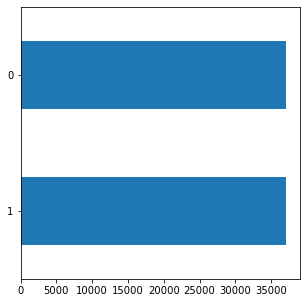

In [83]:
y_Osampled.value_counts().plot.barh();

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X_Osampled, y_Osampled, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [88]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier()

In [89]:
kfold = KFold(n_splits=5, random_state=42, shuffle = True)
results = cross_val_score(xgb_model, X_train, y_train, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 67.20% (0.52%)


In [90]:
y_pred = xgb_model.predict(X_test)

In [91]:
kfold = KFold(n_splits=5, random_state=42 , shuffle = True)
results = cross_val_score(xgb_model, X_test, y_test, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 67.18% (0.65%)


- Model success dropped as expected, but balance in recall and precision achieved

In [92]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.73      0.69     11146
           1       0.69      0.61      0.65     11117

    accuracy                           0.67     22263
   macro avg       0.67      0.67      0.67     22263
weighted avg       0.67      0.67      0.67     22263



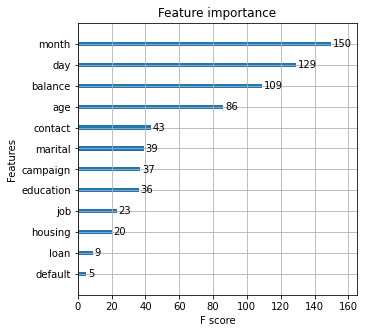

In [93]:
plot_importance(xgb_model)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

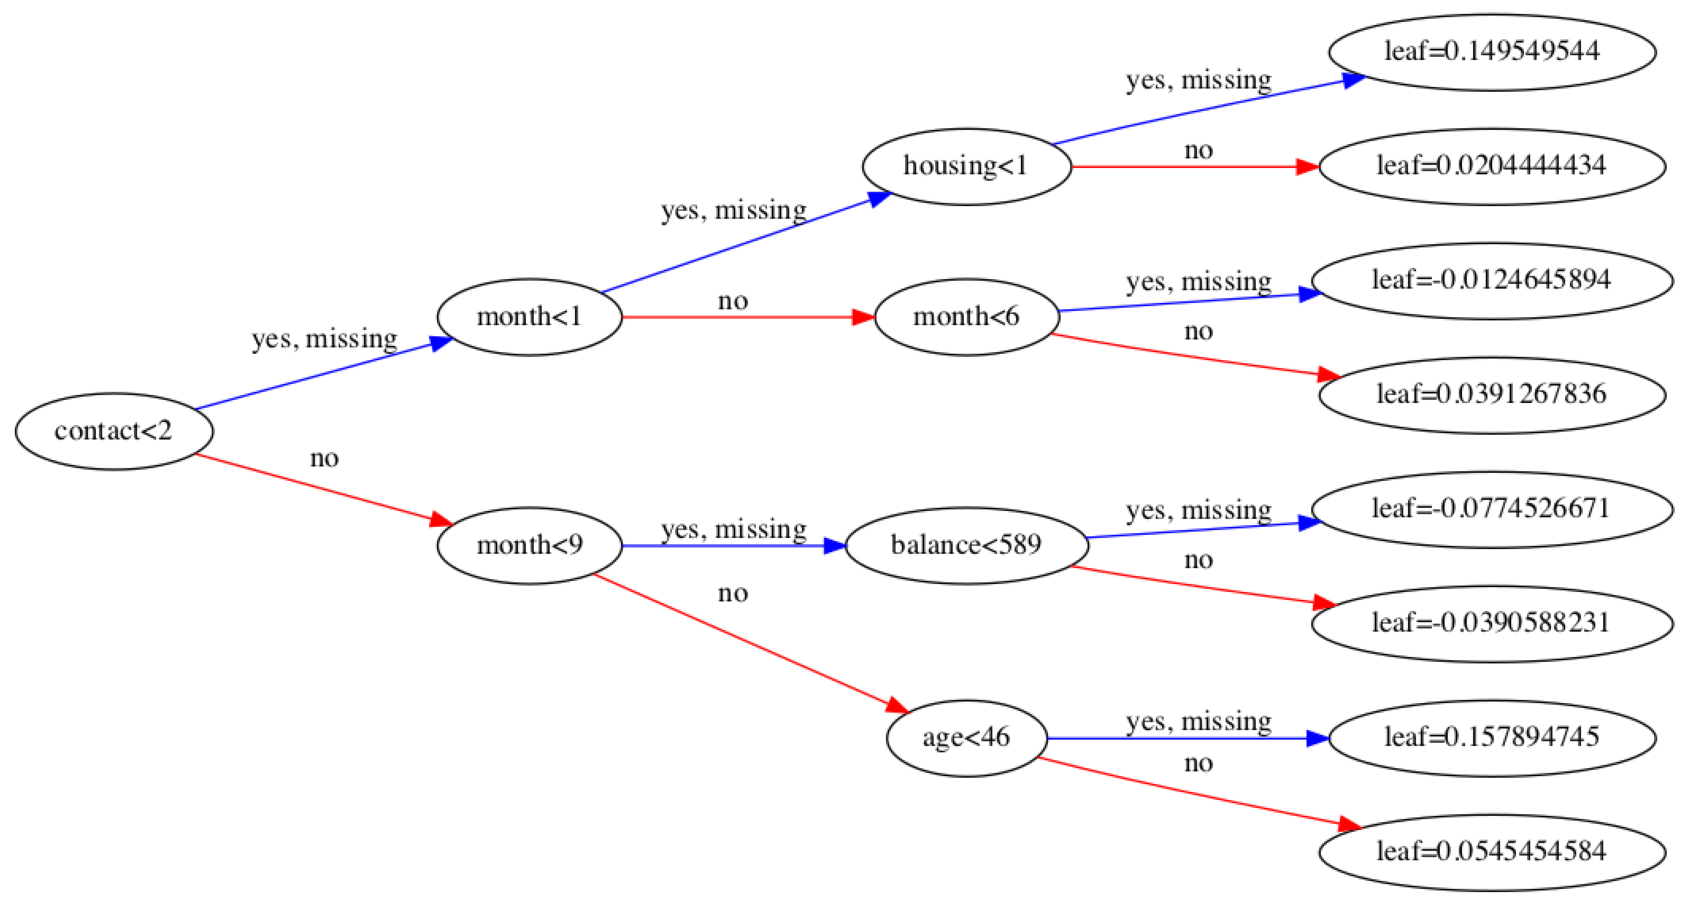

In [133]:
fig, ax = plt.subplots(figsize=(30, 30))
plot_tree(xgb_model, ax=ax , rankdir = 'LR')
plt.show()

In [134]:
probs = xgb_model.predict_proba(X_test)

In [135]:
probs = probs[:, 1]

In [136]:
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.69


In [137]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [138]:
fpr, tpr, thresholds = roc_curve(y_test, probs)

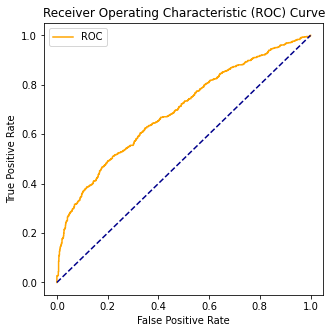

In [139]:
plot_roc_curve(fpr, tpr)

- I also want to see undersampling results

# Undersampling

In [ ]:
df = pd.read_csv('term-deposit-marketing-2020.csv')
df[df.select_dtypes(['object']).columns] = df.select_dtypes(['object']).apply(lambda x: x.astype('category'))
df_cats = df.select_dtypes('category')
le = LabelEncoder()
df[df_cats.columns] = df[df_cats.columns].apply(le.fit_transform)

In [141]:
y = df['y']
X = df.drop(['y','duration'], axis=1)
X = pd.DataFrame(X)

In [142]:
rus = RandomUnderSampler()
X_Usampled, y_Usampled = ros.fit_resample(X, y)

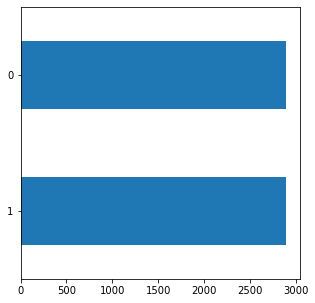

In [143]:
y_Usampled.value_counts().plot.barh();

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X_Usampled, y_Usampled, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [145]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier()

In [146]:
kfold = KFold(n_splits=5, random_state=42, shuffle = True)
results = cross_val_score(xgb_model, X_train, y_train, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 63.71% (1.36%)


In [147]:
y_pred = xgb_model.predict(X_test)

In [148]:
kfold = KFold(n_splits=5, random_state=42 , shuffle = True)
results = cross_val_score(xgb_model, X_test, y_test, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 61.80% (0.88%)


In [149]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.68      0.67       891
           1       0.65      0.62      0.64       847

    accuracy                           0.65      1738
   macro avg       0.65      0.65      0.65      1738
weighted avg       0.65      0.65      0.65      1738



- F Results looking similiar to oversampling F results

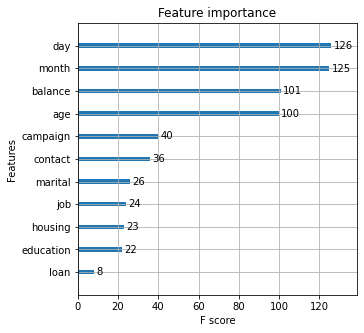

In [150]:
plot_importance(xgb_model)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

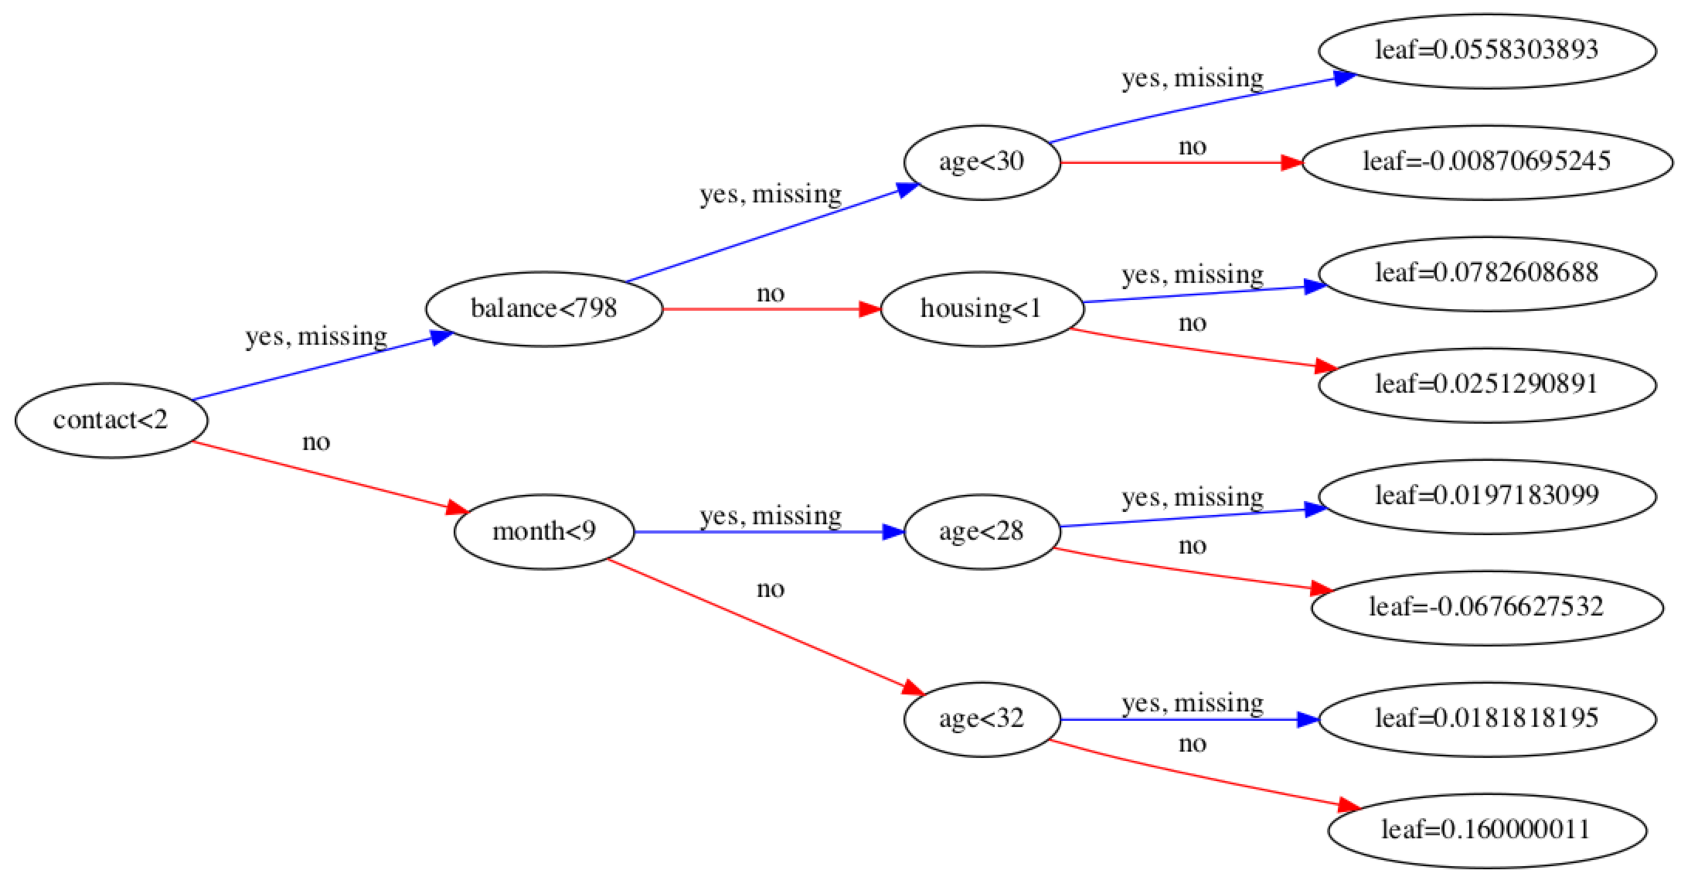

In [151]:
fig, ax = plt.subplots(figsize=(30, 30))
plot_tree(xgb_model,num_trees = 0, ax=ax , rankdir = 'LR')
plt.show()

In [152]:
probs = xgb_model.predict_proba(X_test)

In [153]:
probs = probs[:, 1]

In [154]:
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.71


In [155]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [156]:
fpr, tpr, thresholds = roc_curve(y_test, probs)

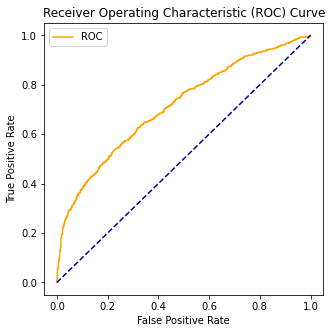

In [157]:
plot_roc_curve(fpr, tpr)

# Personal Conclusion

- Trying to gain more permission to communicate by phone can provide profitability

- People who have not been contacted this year, these may be new acquisition persons, if they do not have home or individual loan payments, they can approach the term deposit offer more warmly.

- It can be the target group for investment products of people under 30 years old and high profits